*A modelagem de tópicos* é uma técnica de aprendizado de máquina não supervisionado usada para descobrir tópicos ocultos em um conjunto de dados de texto. Ela analisa a frequência de palavras em um corpus de documentos e agrupa palavras com significado semelhante em tópicos.

A modelagem de tópicos assume que cada documento é uma mistura de tópicos e que cada tópico é uma distribuição de palavras. O objetivo é encontrar a mistura de tópicos que melhor explica o conjunto de documentos.

O LDA (Latent Dirichlet Allocation), é um modelo probabilístico de tópicos que é amplamente utilizado para analisar conjuntos de dados de texto.

O LDA assume que cada documento é uma mistura de tópicos, e cada tópico é uma distribuição de palavras. O modelo tenta encontrar a melhor mistura de tópicos para cada documento e a melhor distribuição de palavras para cada tópico.

1. IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
# manipulação de dataframes
import re 
import unicodedata  
import pandas as pd
from pprint import pprint 

# Library Natural Language Toolkit - NLTK
import nltk 
nltk.download('punkt')  
nltk.download('wordnet') 

# remoção de palavras
from nltk.corpus import stopwords 
stopwords = nltk.corpus.stopwords.words('portuguese')

# normalizar textos - corrige abreviações, gírias, erros ortográficos, dentre outras funcionalidades
from enelvo.normaliser import Normaliser

# lematização
import spacy
spacy.cli.download("pt_core_news_sm")

# LDA
import gensim 
from gensim import corpora
import gensim.corpora as corpora 
from gensim.models import CoherenceModel 
from gensim.utils import simple_preprocess 
 
# gráficos/imagens
import pyLDAvis
import seaborn as sns 
import pyLDAvis.gensim
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 
from wordcloud import WordCloud, STOPWORDS 

%matplotlib inline 

import logging 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)  

import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package punkt to /Users/pesati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/pesati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 11.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/Users/pesati/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/pesati/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [2]:
# Mostrar o texto completo no dataframe

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

2. WEBSCRAPING DOS DADOS

#####  * Após realização do webscraping no site, foi gerado um arquivo xlsx com os dados nas suas respectivas colunas.

In [3]:
path = '/Users/pesati/Desktop/Projeto TCC/webscraping/all_complaints.xlsx'

dataframe = pd.read_excel(path)
dataframe.head()

,location,date,id,category,product,problem,complaint,response
0,São Pedro da Aldeia - RJ,01/05/2024 às 13:25,ID: 187882723,Concessionárias de Serviços,Luz,Demora na execução,"Na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. Deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. Na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. Desde então não mais retornaram. Estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia.",Não respondida
1,Caucaia - CE,01/05/2024 às 11:42,ID: 187876863,Concessionárias de Serviços,Luz,Demora na execução,Já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.,Não respondida
2,Nova Olinda - CE,01/05/2024 às 11:09,ID: 187874849,Não encontrei meu problema,NaN,Cobrança indevida,Ja procurei no app enel pra tirar essa conta de fatura por imail e nao acho por favor quero receber em maos o minha conta todos os meses na minha recidrncia msm e um debito qur esta no serasa no meu nome que nem devoo nao vou paga algo qur nao devo assim me complica neh botando meu nome no serasa por uma conta qur nao devoo e por favor que ajeitem essas duas questoens logo ..,Não respondida
3,Itapipoca - CE,01/05/2024 às 10:26,ID: 187872479,NaN,Luz,Demora na execução,"Entrei em contato com a Enel,pela primeira vez fiz a solicitação de primeira ligação,eles deram o prazo de 5 dias úteis,mais eles não apareceram, entrei em contato novamente,mim deram mais 5 dias úteis,sendo que já tinha mim dado 5 dias , deram mais 5 novamente, resumindo estou a quase 15 dias no escuro,com minha esposa,meu filho de 8 anos que é neuro divergente, estamos passando uma barra no escuro sem energia elétrica,ainda sem nenhum resposta, queria pelo amor de deus que alguém ou algum órgão pudesse mim ajudar.",Não respondida
4,Maceió - AL,01/05/2024 às 10:17,ID: 187871927,NaN,Pagamentos e Documentos,Demora na execução,Precisei fazer uma consulta no serasa e vi que estava com uma dívida de pouco mais de 18 reais que não lembro de que foi (acredito que foi cobrança [Editado pelo Reclame Aqui]). Paguei essa dívida pelo site do governo federal no programa desenrola. Esperei os cinco dias úteis e simplesmente a Enel não retirou meu nome do Serasa. Isso é um absurdo! Uma empresa que faz uma cobrança de nem sei o que e ainda não retira o nome da inadimplência mesmo depois de pago. Empresa irresponsável e desorganizada.,Não respondida


3. PRÉ PROCESSAMENTO DOS DADOS

#####  * Esta etapa é crucial para garantir que os dados estejam preparados para a modelagem e que o algoritmo possa funcionar de forma eficiente e precisa.

<ol>
<li>Remover pontuação (caracteres especiais)</li>
<li>Transformar todas as palavras em letras minúsculas</li>
<li>Remover as stopwords - são palavras que carregam pouca relevância semântica.</li>
<li>Tratamento de abreviações e gírias</li>
<li>Tokenização - pegar cada uma das palavras do texto (tokens) e armazená-las em uma lista</li>
<li>Stemização - reduzir as palavras flexionadas à sua raiz</li>
<li>Lematização - representar as palavras através do infinitivo para os verbos, e do masculino singular no caso de substantivos e adjetivos.</li>
</ol>

In [4]:
df_head = dataframe.head()

In [7]:
# Converter tudo para minúsculo

df_head['complaint'] = df_head['complaint'].apply(lambda x: x.lower())
df_head

/var/folders/3g/_ksy3nnn5hq430rm7x7w_t080000gn/T/ipykernel_1656/1363182643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['complaint'] = df_head['complaint'].apply(lambda x: x.lower())


,location,date,id,category,product,problem,complaint,response
0,São Pedro da Aldeia - RJ,01/05/2024 às 13:25,ID: 187882723,Concessionárias de Serviços,Luz,Demora na execução,"na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. desde então não mais retornaram. estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia.",Não respondida
1,Caucaia - CE,01/05/2024 às 11:42,ID: 187876863,Concessionárias de Serviços,Luz,Demora na execução,já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.,Não respondida
2,Nova Olinda - CE,01/05/2024 às 11:09,ID: 187874849,Não encontrei meu problema,NaN,Cobrança indevida,ja procurei no app enel pra tirar essa conta de fatura por imail e nao acho por favor quero receber em maos o minha conta todos os meses na minha recidrncia msm e um debito qur esta no serasa no meu nome que nem devoo nao vou paga algo qur nao devo assim me complica neh botando meu nome no serasa por uma conta qur nao devoo e por favor que ajeitem essas duas questoens logo ..,Não respondida
3,Itapipoca - CE,01/05/2024 às 10:26,ID: 187872479,NaN,Luz,Demora na execução,"entrei em contato com a enel,pela primeira vez fiz a solicitação de primeira ligação,eles deram o prazo de 5 dias úteis,mais eles não apareceram, entrei em contato novamente,mim deram mais 5 dias úteis,sendo que já tinha mim dado 5 dias , deram mais 5 novamente, resumindo estou a quase 15 dias no escuro,com minha esposa,meu filho de 8 anos que é neuro divergente, estamos passando uma barra no escuro sem energia elétrica,ainda sem nenhum resposta, queria pelo amor de deus que alguém ou algum órgão pudesse mim ajudar.",Não respondida
4,Maceió - AL,01/05/2024 às 10:17,ID: 187871927,NaN,Pagamentos e Documentos,Demora na execução,precisei fazer uma consulta no serasa e vi que estava com uma dívida de pouco mais de 18 reais que não lembro de que foi (acredito que foi cobrança [editado pelo reclame aqui]). paguei essa dívida pelo site do governo federal no programa desenrola. esperei os cinco dias úteis e simplesmente a enel não retirou meu nome do serasa. isso é um absurdo! uma empresa que faz uma cobrança de nem sei o que e ainda não retira o nome da inadimplência mesmo depois de pago. empresa irresponsável e desorganizada.,Não respondida


In [10]:
# Convertendo para lista

complaints = df_head.complaint.values.tolist()
complaints

['na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. desde então não mais retornaram. estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia.',
 'já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.',
 'ja procurei no app enel pra tirar essa conta de fatura por imail e nao acho por favor quero receb

In [11]:
# Removendo caracteres especiais e números (regex)

complaints = [re.sub(r'[^\w\s0-9]', ' ', re.sub('[0-9]', '', word)) for word in complaints]

In [12]:
# O Normaliser corrige abreviações (por exemplo: vc, gnt, oq, pq, etc.) e erros ortográficos.
# sanitize - remove pontuações e emojis

normalizador = Normaliser(tokenizer='readable', sanitize=True)
complaints = [normalizador.normalise(word) for word in complaints]

In [13]:
complaints

['na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica causando fogo e explosão na rede deixando moradores sem energia elétrica uma equipe somente apareceu no domingo tirou fotos e foram embora alegando não ter equipamento na segunda outra equipe veio e somente cortou o tronco da árvore e foram embora também alegando não ter equipamentos desde então não mais retornaram estamos sem energia elétrica desde sábado hoje é quarta e não veio mais nenhuma equipe restabelecer a energia',
 'já faz mais mais de horas praticamente sem energia porque nada funciona pois e energia fraca desde segunda feira horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos você paga um absurdo por um serviço que não presta',
 'já procurei no appplication anel pra tirar essa conta de fatura por underline e não acho por favor quero re

In [14]:
# Remover os caracteres Non ASCII (acentuações)

complaints = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in complaints]

In [17]:
# Adicionando novas stopwords em português

new_stopwords = ['ai', 'ainda', 'agora', 'ate', 'aqui', 'de', 'entao', 'gente', 
                 'ja', 'la', 'nao', 'ne', 'ninguem', 'porque', 'ser', 'sempre', 
                 'sobre', 'so', 'ta', 'tambem', 'ter', 'tudo', 'vai', 'vc', 'voce', 'vir', 'viu']

stopwords.extend(new_stopwords)

In [ ]:
'''
new_stopwords = ['ai', 'ainda', 'agora', 'anel', 'ate', 'aqui', 'de', 'dia', 'entao', 'gente', 
                 'ir', 'ja', 'la', 'nao', 'ne', 'ninguem', 'pra', 'pois', 'porque', 'ser', 'sempre', 
                 'sobre', 'so', 'ta', 'tambem', 'ter', 'tudo', 'vai', 'vc', 'voce', 'vir', 'viu']

stopwords.extend(new_stopwords)
'''

In [19]:
# Remover as stopwords
complaints = [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in complaints]
complaints = [" ".join(word) for word in complaints]

In [20]:
complaints

['madrugada sexta sabado arvore caiu cima fiacao eletrica causando fogo explosao rede deixando moradores energia eletrica equipe somente apareceu domingo tirou fotos embora alegando equipamento segunda outra equipe veio somente cortou tronco arvore embora alegando equipamentos desde retornaram energia eletrica desde sabado hoje quarta veio nenhuma equipe restabelecer energia',
 'faz horas praticamente energia nada funciona pois energia fraca desde segunda feira horas manha energia hoje quarta feira nada resolverem liguei tantas vezes conto total descaso vou estressar partir amanha irei atras direitos paga absurdo servico presta',
 'procurei appplication anel pra tirar conta fatura underline acho favor quero receber maos conta todos meses residencia debito serasa nome devoo vou paga algo devo assim complica botando nome serasa conta devoo favor ajeitem duas questoes logo',
 'entrei contato anel primeira vez fiz solicitacao primeira ligacao deram prazo dias uteis apareceram entrei contat

In [21]:
# realizar a lematização
nlp = spacy.load('pt_core_news_sm')
lemmas_complaints = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
lemmas_complaints = [" ".join(word) for word in lemmas_complaints]

In [22]:
lemmas_complaints

['madrugar sexta sabar arvore cair cima fiacao eletrico causar fogo explosao rede deixar morador energia eletrico equipe somente aparecer domingo tirar foto embora alegar equipamento segundo outro equipe vir somente cortar tronco arvore embora alegar equipamento desde retornar energia eletrico desde sabar hoje quarto vir nenhum equipe restabelecer energia',
 'fazer hora praticamente energia nada funcionar pois energia fraco desde segundo feira hora mar energia hoje quarto feira nada resolver liguei tanto vez conto total descaso ir estressar partir amanha irar atra direito pagar absurdo servico prestar',
 'procur appplication anel pra tirar conta fatura underline achar favor querer receber mao contar todo mês residenciar debito serasa nome devoo vou pagar algo devor assim complico botar nome serasa contar devoo favor ajeitar dois questoe logo',
 'entrar contato anel primeira vez fiz solicitacao primeiro ligacao dar prazo dia utel aparecer entrar contato novamente eu dar dia utel ser eu 

In [ ]:
'''
lemm = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
texts_out = [[token.lemma_ for token in nlp(" ".join(sent)) if token.pos_ in allowed_postags] for sent in lemm]
texts_out
'''


In [27]:
# Comparando as reclamações com o pré-processamento delas
df_lemmas_complaints = pd.DataFrame(lemmas_complaints, columns=['preprocessing complaints'])
df_complaints = pd.concat([df_head['complaint'], df_lemmas_complaints], axis=1)

In [28]:
df_complaints

,complaint,preprocessing complaints
0,"na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. desde então não mais retornaram. estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia.",madrugar sexta sabar arvore cair cima fiacao eletrico causar fogo explosao rede deixar morador energia eletrico equipe somente aparecer domingo tirar foto embora alegar equipamento segundo outro equipe vir somente cortar tronco arvore embora alegar equipamento desde retornar energia eletrico desde sabar hoje quarto vir nenhum equipe restabelecer energia
1,já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.,fazer hora praticamente energia nada funcionar pois energia fraco desde segundo feira hora mar energia hoje quarto feira nada resolver liguei tanto vez conto total descaso ir estressar partir amanha irar atra direito pagar absurdo servico prestar
2,ja procurei no app enel pra tirar essa conta de fatura por imail e nao acho por favor quero receber em maos o minha conta todos os meses na minha recidrncia msm e um debito qur esta no serasa no meu nome que nem devoo nao vou paga algo qur nao devo assim me complica neh botando meu nome no serasa por uma conta qur nao devoo e por favor que ajeitem essas duas questoens logo ..,procur appplication anel pra tirar conta fatura underline achar favor querer receber mao contar todo mês residenciar debito serasa nome devoo vou pagar algo devor assim complico botar nome serasa contar devoo favor ajeitar dois questoe logo
3,"entrei em contato com a enel,pela primeira vez fiz a solicitação de primeira ligação,eles deram o prazo de 5 dias úteis,mais eles não apareceram, entrei em contato novamente,mim deram mais 5 dias úteis,sendo que já tinha mim dado 5 dias , deram mais 5 novamente, resumindo estou a quase 15 dias no escuro,com minha esposa,meu filho de 8 anos que é neuro divergente, estamos passando uma barra no escuro sem energia elétrica,ainda sem nenhum resposta, queria pelo amor de deus que alguém ou algum órgão pudesse mim ajudar.",entrar contato anel primeira vez fiz solicitacao primeiro ligacao dar prazo dia utel aparecer entrar contato novamente eu dar dia utel ser eu dar dia dar novamente resumir quase dia escuro esposo filho ano neuro divergente passar barra escuro energia eletricar nenhum resposta querer amor deus alguir algum orgao poder eu ajudar
4,precisei fazer uma consulta no serasa e vi que estava com uma dívida de pouco mais de 18 reais que não lembro de que foi (acredito que foi cobrança [editado pelo reclame aqui]). paguei essa dívida pelo site do governo federal no programa desenrola. esperei os cinco dias úteis e simplesmente a enel não retirou meu nome do serasa. isso é um absurdo! uma empresa que faz uma cobrança de nem sei o que e ainda não retira o nome da inadimplência mesmo depois de pago. empresa irresponsável e desorganizada.,precisar fazer consulta serasa ver divir pouco real lembro acreditar cobranca editar reclame paguei divir site governo federal programa desenrolar esperei cinco dia utei simplesmente anel retirar nome serasa absurdo empresa fazer cobranca saber retirar nome inadimplencia pagar empresa irresponsavel desorganizar


******
******

In [186]:
def pre_processing(complaints):
    
    complaints = [re.sub(r'[^\w\s0-9]', ' ', re.sub('[0-9]', '', word)) for word in complaints]
    complaints = [normalizador.normalise(word) for word in complaints]
    complaints = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in complaints]
    
    return complaints

In [ ]:
def remove_stopwords(complaints):
    complaints = [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in complaints]
    return complaints

data_words_nostops = remove_stopwords(complaints)

for reclamacao in data_words_nostops:
    print(" ".join(reclamacao))

In [ ]:
def lemmatize_text(complaints):
    lemmas_complaints = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
    lemmas_complaints = [" ".join(word) for word in lemmas_complaints]
    return lemmas_complaints

lemma = lemmatize_text(complaints)
lemma

******
******

4. TRANSFORMAÇÃO DE DADOS: CORPUS E DICIONÁRIO

##### O LDA exige os dados em um determinado formato. Necessita do corpus como um dicionário de mapeamento, onde cada palavra possui um ID numérico único. Também precisa do corpus como uma matriz de frequência termo-documento que contém a frequência de cada palavra em cada documento.

In [29]:
# juntar em uma única lista

lemmas_complaints = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
lemmas_complaints = [item for sublist in lemmas_complaints for item in sublist]
print(lemmas_complaints)

['madrugar', 'sexta', 'sabar', 'arvore', 'cair', 'cima', 'fiacao', 'eletrico', 'causar', 'fogo', 'explosao', 'rede', 'deixar', 'morador', 'energia', 'eletrico', 'equipe', 'somente', 'aparecer', 'domingo', 'tirar', 'foto', 'embora', 'alegar', 'equipamento', 'segundo', 'outro', 'equipe', 'vir', 'somente', 'cortar', 'tronco', 'arvore', 'embora', 'alegar', 'equipamento', 'desde', 'retornar', 'energia', 'eletrico', 'desde', 'sabar', 'hoje', 'quarto', 'vir', 'nenhum', 'equipe', 'restabelecer', 'energia', 'fazer', 'hora', 'praticamente', 'energia', 'nada', 'funcionar', 'pois', 'energia', 'fraco', 'desde', 'segundo', 'feira', 'hora', 'mar', 'energia', 'hoje', 'quarto', 'feira', 'nada', 'resolver', 'liguei', 'tanto', 'vez', 'conto', 'total', 'descaso', 'ir', 'estressar', 'partir', 'amanha', 'irar', 'atra', 'direito', 'pagar', 'absurdo', 'servico', 'prestar', 'procur', 'appplication', 'anel', 'pra', 'tirar', 'conta', 'fatura', 'underline', 'achar', 'favor', 'querer', 'receber', 'mao', 'contar', 

In [30]:
# doc2bow espera receber uma lista de tokens (strings) para cada documento
# Passar uma lista com a única lista de tokens
# doc2bow é uma função do Gensim que transforma um documento de texto em uma representação de vetor de bolsa de palavras (Bag-of-Words, BoW)
 
id2word = corpora.Dictionary([lemmas_complaints])  
corpus = [id2word.doc2bow(lemmas_complaints)] 
print(corpus[0])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 2), (29, 2), (30, 1), (31, 1), (32, 4), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 5), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 2), (52, 2), (53, 7), (54, 2), (55, 2), (56, 3), (57, 2), (58, 1), (59, 1), (60, 1), (61, 3), (62, 1), (63, 1), (64, 2), (65, 3), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 2), (93, 1), (94, 4), (95, 2), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

In [31]:
# mostrando as palavras e suas frequências

id_frequency = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
print(id_frequency)

[[('absurdo', 2), ('achar', 1), ('acreditar', 1), ('ajeitar', 1), ('ajudar', 1), ('alegar', 2), ('algo', 1), ('alguir', 1), ('algum', 1), ('amanha', 1), ('amor', 1), ('anel', 3), ('ano', 1), ('aparecer', 2), ('appplication', 1), ('arvore', 2), ('assim', 1), ('atra', 1), ('barra', 1), ('botar', 1), ('cair', 1), ('causar', 1), ('cima', 1), ('cinco', 1), ('cobranca', 2), ('complico', 1), ('consulta', 1), ('conta', 1), ('contar', 2), ('contato', 2), ('conto', 1), ('cortar', 1), ('dar', 4), ('debito', 1), ('deixar', 1), ('descaso', 1), ('desde', 3), ('desenrolar', 1), ('desorganizar', 1), ('deus', 1), ('devoo', 2), ('devor', 1), ('dia', 5), ('direito', 1), ('divergente', 1), ('divir', 2), ('dois', 1), ('domingo', 1), ('editar', 1), ('eletricar', 1), ('eletrico', 3), ('embora', 2), ('empresa', 2), ('energia', 7), ('entrar', 2), ('equipamento', 2), ('equipe', 3), ('escuro', 2), ('esperei', 1), ('esposo', 1), ('estressar', 1), ('eu', 3), ('explosao', 1), ('fatura', 1), ('favor', 2), ('fazer', 

In [32]:
lists = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
print(lists)

[['madrugar', 'sexta', 'sabar', 'arvore', 'cair', 'cima', 'fiacao', 'eletrico', 'causar', 'fogo', 'explosao', 'rede', 'deixar', 'morador', 'energia', 'eletrico', 'equipe', 'somente', 'aparecer', 'domingo', 'tirar', 'foto', 'embora', 'alegar', 'equipamento', 'segundo', 'outro', 'equipe', 'vir', 'somente', 'cortar', 'tronco', 'arvore', 'embora', 'alegar', 'equipamento', 'desde', 'retornar', 'energia', 'eletrico', 'desde', 'sabar', 'hoje', 'quarto', 'vir', 'nenhum', 'equipe', 'restabelecer', 'energia'], ['fazer', 'hora', 'praticamente', 'energia', 'nada', 'funcionar', 'pois', 'energia', 'fraco', 'desde', 'segundo', 'feira', 'hora', 'mar', 'energia', 'hoje', 'quarto', 'feira', 'nada', 'resolver', 'liguei', 'tanto', 'vez', 'conto', 'total', 'descaso', 'ir', 'estressar', 'partir', 'amanha', 'irar', 'atra', 'direito', 'pagar', 'absurdo', 'servico', 'prestar'], ['procur', 'appplication', 'anel', 'pra', 'tirar', 'conta', 'fatura', 'underline', 'achar', 'favor', 'querer', 'receber', 'mao', 'cont

5. MODELAGEM DE BIGRAMAS E TRIGRAMAS

In [33]:
# Criando modelos de bigramas e trigramas
# min_count: este parâmetro define a frequência mínima de um bigrama para ser considerado
# threshold: este parâmetro controla a "força" da associação entre duas palavras para formar um bigrama

bigram = gensim.models.Phrases(lists, min_count=2, threshold=20)
trigram = gensim.models.Phrases(bigram[lists], threshold=10)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [34]:
print(trigram_mod[bigram_mod[lists[0]]])

['madrugar', 'sexta', 'sabar', 'arvore', 'cair', 'cima', 'fiacao', 'eletrico', 'causar', 'fogo', 'explosao', 'rede', 'deixar', 'morador', 'energia', 'eletrico', 'equipe', 'somente', 'aparecer', 'domingo', 'tirar', 'foto', 'embora', 'alegar', 'equipamento', 'segundo', 'outro', 'equipe', 'vir', 'somente', 'cortar', 'tronco', 'arvore', 'embora', 'alegar', 'equipamento', 'desde', 'retornar', 'energia', 'eletrico', 'desde', 'sabar', 'hoje', 'quarto', 'vir', 'nenhum', 'equipe', 'restabelecer', 'energia']


In [35]:
def make_bigrams(lists):
     return [bigram_mod[doc] for doc in lists]

def make_trigrams(lists):
     return [trigram_mod[bigram_mod[doc]] for doc in lists]  

bigrams = make_bigrams(lists)
trigrams = make_trigrams(lists)

6. APLICAÇÃO DO MODELO LDA

##### * A perplexidade é uma medida de quão bem o modelo LDA se ajusta aos dados. Basicamente, ela mede a capacidade do modelo de prever novos documentos. Uma perplexidade baixa indica que o modelo se ajusta bem aos dados e é capaz de prever novos documentos com maior precisão. Uma perplexidade alta sugere que o modelo não está se ajustando bem aos dados. </br>

##### * A coerência é uma medida da interpretabilidade e inteligibilidade dos tópicos gerados pelo modelo LDA. Ela avalia se as palavras dentro de um tópico são semanticamente relacionadas e se o tópico como um todo faz sentido. Uma pontuação de coerência alta indica que os tópicos são bem definidos e compreensíveis. Uma pontuação baixa pode indicar que os tópicos são confusos ou que as palavras dentro de um tópico não estão relacionadas semanticamente.

 - Entendendo os parâmetros do modelo:

<ol>
<li> corpus: Este é o conjunto de documentos que serão usados para treinar o modelo LDA. Você deve fornecer um corpus de documentos pré-processados na forma de uma lista de listas de inteiros, onde cada inteiro representa o índice de um termo no vocabulário.</li>
<li>id2word: Este é um dicionário que mapeia índices de palavras para palavras reais. Isso é usado para recuperar as palavras correspondentes aos tópicos gerados pelo modelo.</li>
<li>num_topics: Este é o número de tópicos que você deseja que o modelo descubra nos dados.</li>
<li>random_state: Este parâmetro define a semente aleatória para o modelo LDA. Ao definir uma semente, você garante que os resultados do modelo sejam repetíveis.</li>
<li>update_every: Este parâmetro controla a frequência com que o modelo é atualizado durante o treinamento. Um valor de 1 significa que o modelo é atualizado após o processamento de cada documento.</li>
<li>chunksize: Este parâmetro define o tamanho do bloco de documentos que será usado para atualizar o modelo. Um tamanho de bloco maior pode ser mais eficiente para grandes conjuntos de dados.</li>
<li>passes: Este parâmetro define quantas vezes o modelo será treinado sobre o corpus inteiro. Um número maior de passes pode levar a resultados mais precisos, mas também pode levar mais tempo para o treinamento.</li>
<li>alpha: Este parâmetro controla a concentração de tópicos. Ele define o parâmetro de Dirichlet para a distribuição de tópicos de cada documento. 'auto' significa que a biblioteca Gensim tentará encontrar automaticamente o melhor valor para alpha.</li>
<li>per_word_topics: Este parâmetro indica se você deseja obter a distribuição de tópicos para cada palavra no corpus. Se for True, o modelo também fornecerá a probabilidade de cada palavra pertencer a cada tópico.</li>
</ol>

In [36]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                            id2word = id2word,
                                            num_topics = 5,
                                            random_state = 60,
                                            update_every = 1,
                                            chunksize = 100,
                                            passes = 5,
                                            alpha = 'auto',
                                            per_word_topics = True)

In [38]:
pprint(lda_model.print_topics()) 

[(0,
  '0.008*"dia" + 0.008*"energia" + 0.007*"nome" + 0.007*"serasa" + '
  '0.007*"desde" + 0.007*"eu" + 0.007*"dar" + 0.007*"pagar" + 0.007*"anel" + '
  '0.007*"equipe"'),
 (1,
  '0.009*"energia" + 0.008*"dia" + 0.008*"serasa" + 0.008*"nome" + '
  '0.007*"fazer" + 0.007*"pagar" + 0.007*"anel" + 0.007*"eletrico" + '
  '0.007*"dar" + 0.007*"entrar"'),
 (2,
  '0.009*"energia" + 0.008*"dar" + 0.008*"dia" + 0.008*"serasa" + 0.008*"nome" '
  '+ 0.008*"eletrico" + 0.007*"pagar" + 0.007*"equipe" + 0.007*"hoje" + '
  '0.007*"anel"'),
 (3,
  '0.029*"energia" + 0.021*"dia" + 0.017*"serasa" + 0.017*"dar" + 0.017*"nome" '
  '+ 0.013*"desde" + 0.013*"anel" + 0.013*"fazer" + 0.013*"equipe" + '
  '0.013*"eu"'),
 (4,
  '0.009*"energia" + 0.008*"dar" + 0.008*"nome" + 0.008*"dia" + 0.007*"eu" + '
  '0.007*"serasa" + 0.007*"desde" + 0.007*"equipe" + 0.007*"fazer" + '
  '0.007*"eletrico"')]


In [39]:
# Calculando a perplexidade e o score de coerência para avaliar a qualidade de um modelo LDA

print('\nPerplexity: ', lda_model.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model, texts = bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() 
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.806006950196913

Coherence Score:  0.35790381262680065


7. Descobrir a quantidade de tópicos a ser utilizada no LDA

    O LDA irá analisar seu corpus de textos e tentar identificar 10 temas recorrentes que melhor explicam a estrutura temática dos documentos. Cada tópico será representado por uma distribuição de probabilidade sobre as palavras do seu vocabulário, onde as palavras mais prováveis de aparecerem nesse tópico terão pesos maiores.

    A escolha do número de tópicos é crucial para a qualidade do modelo:

    * Número muito baixo: O modelo pode ser muito genérico e não capturar nuances importantes nos seus dados. </br>
    * Número muito alto: O modelo pode ser muito específico e criar tópicos irrelevantes ou sobrepostos.


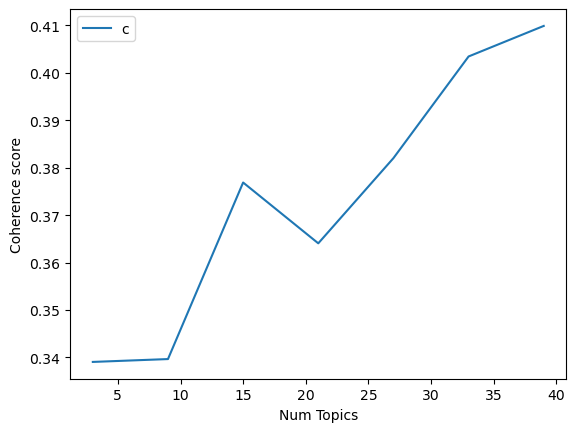

In [40]:
# determinar a melhor quantidade de tópicos para a modelagem

def compute_coherence_values(dictionary, corpus, texts, limit, start = 3, step = 3):
   
    coherence_values = []
    model_list = [] 
    
    for num_topics in range(start, limit, step): 
        model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = num_topics, id2word = id2word)
        model_list.append(model)         
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v') 
        coherence_values.append(coherencemodel.get_coherence())            
    
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary = id2word, corpus = corpus, texts = bigrams, start = 3, limit = 40, step = 6)

limit = 40; start = 3; step = 6; 

x = range(start, limit, step) 

plt.plot(x, coherence_values) 
plt.xlabel("Num Topics") 
plt.ylabel("Coherence score") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

In [42]:
# lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico

for m, cv in zip(x, coherence_values):
     print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))

A quantidade de tópicos = 3  tem um valor de coerência de  0.3391
A quantidade de tópicos = 9  tem um valor de coerência de  0.3397
A quantidade de tópicos = 15  tem um valor de coerência de  0.3769
A quantidade de tópicos = 21  tem um valor de coerência de  0.3641
A quantidade de tópicos = 27  tem um valor de coerência de  0.382
A quantidade de tópicos = 33  tem um valor de coerência de  0.4034
A quantidade de tópicos = 39  tem um valor de coerência de  0.4099


In [78]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.019*"energia" + 0.016*"dia" + 0.014*"serasa" + 0.013*"dar" + '
  '0.012*"pagar" + 0.012*"eu" + 0.011*"equipe" + 0.011*"fazer" + '
  '0.011*"eletrico" + 0.010*"nome"'),
 (1,
  '0.029*"energia" + 0.018*"dia" + 0.017*"nome" + 0.014*"eletrico" + '
  '0.013*"dar" + 0.012*"desde" + 0.012*"eu" + 0.012*"anel" + 0.012*"fazer" + '
  '0.011*"serasa"'),
 (2,
  '0.017*"energia" + 0.017*"dia" + 0.015*"serasa" + 0.012*"nome" + 0.012*"dar" '
  '+ 0.012*"eu" + 0.011*"eletrico" + 0.011*"fazer" + 0.010*"anel" + '
  '0.010*"pagar"'),
 (3,
  '0.014*"energia" + 0.014*"serasa" + 0.012*"nome" + 0.011*"dia" + '
  '0.011*"pagar" + 0.010*"eu" + 0.009*"dar" + 0.009*"desde" + 0.009*"hoje" + '
  '0.009*"eletrico"'),
 (4,
  '0.018*"energia" + 0.014*"dia" + 0.014*"dar" + 0.012*"serasa" + '
  '0.011*"fazer" + 0.011*"nome" + 0.010*"anel" + 0.010*"escuro" + '
  '0.010*"divir" + 0.009*"equipe"'),
 (5,
  '0.009*"dia" + 0.009*"energia" + 0.009*"serasa" + 0.008*"eletrico" + '
  '0.008*"nome" + 0.008*"dar" + 0.008*

8. PALAVRAS CHAVE EM CADA DOCUMENTO

In [44]:
texto_original = df_head.complaint.values.tolist()
texto_original


['na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. desde então não mais retornaram. estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia.',
 'já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.',
 'ja procurei no app enel pra tirar essa conta de fatura por imail e nao acho por favor quero receb

In [77]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texto_original):

    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame({'Dominant_Topic': [int(topic_num)], 'Perc_Contribution': [round(prop_topic,4)], 'Topic_Keywords': [topic_keywords]})], ignore_index=True)
            else:
                break

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texto_original)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.9959,"energia, dia, serasa, dar, nome, equipe, anel, eletrico, fazer, eu","na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. desde então não mais retornaram. estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia."
1,1,NaN,NaN,NaN,já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.
2,2,NaN,NaN,NaN,ja procurei no app enel pra tirar essa conta de fatura por imail e nao acho por favor quero receber em maos o minha conta todos os meses na minha recidrncia msm e um debito qur esta no serasa no meu nome que nem devoo nao vou paga algo qur nao devo assim me complica neh botando meu nome no serasa por uma conta qur nao devoo e por favor que ajeitem essas duas questoens logo ..
3,3,NaN,NaN,NaN,"entrei em contato com a enel,pela primeira vez fiz a solicitação de primeira ligação,eles deram o prazo de 5 dias úteis,mais eles não apareceram, entrei em contato novamente,mim deram mais 5 dias úteis,sendo que já tinha mim dado 5 dias , deram mais 5 novamente, resumindo estou a quase 15 dias no escuro,com minha esposa,meu filho de 8 anos que é neuro divergente, estamos passando uma barra no escuro sem energia elétrica,ainda sem nenhum resposta, queria pelo amor de deus que alguém ou algum órgão pudesse mim ajudar."
4,4,NaN,NaN,NaN,precisei fazer uma consulta no serasa e vi que estava com uma dívida de pouco mais de 18 reais que não lembro de que foi (acredito que foi cobrança [editado pelo reclame aqui]). paguei essa dívida pelo site do governo federal no programa desenrola. esperei os cinco dias úteis e simplesmente a enel não retirou meu nome do serasa. isso é um absurdo! uma empresa que faz uma cobrança de nem sei o que e ainda não retira o nome da inadimplência mesmo depois de pago. empresa irresponsável e desorganizada.


In [80]:
def plot_frequency_wordcloud(df, colname):
    
  df['words'] = df[colname].str.split()

  word_freq = df['words'].explode().value_counts()

  most_common_words = word_freq.head(20)

  stop_words = nltk.corpus.stopwords.words('portuguese') + new_stopwords

  wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                colormap='viridis',
                stopwords = set(stop_words), 
                min_font_size = 10,
                random_state=1).generate_from_frequencies(most_common_words)

  plt.figure(figsize = (5, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()

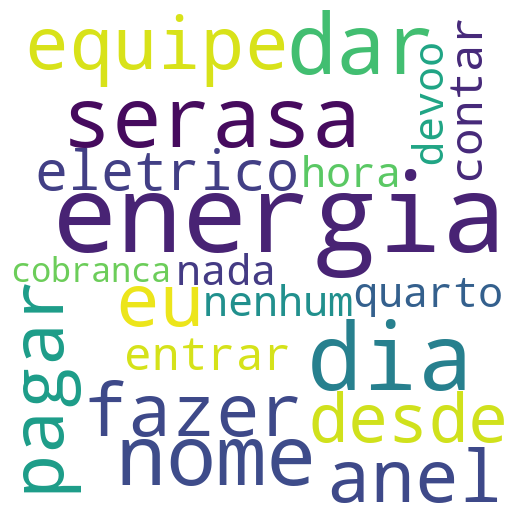

In [82]:
plot_frequency_wordcloud(df_complaints, 'preprocessing complaints')

In [119]:
def plot_frequency_barchart(df, colname):
  
  df['words'] = df[colname].str.split()

  word_freq = df['words'].explode().value_counts()

  most_common_words = word_freq.head(20)

  plt.figure(figsize=[8,6])


  sns.barplot(x = most_common_words.index, y = most_common_words.values, hue = most_common_words.index, palette = "husl", legend = False)


  plt.xlabel("Palavras")
  plt.ylabel("Frequência")
  plt.title("20 palavras mais frequentes")
  plt.xticks(rotation=90)
  plt.show()

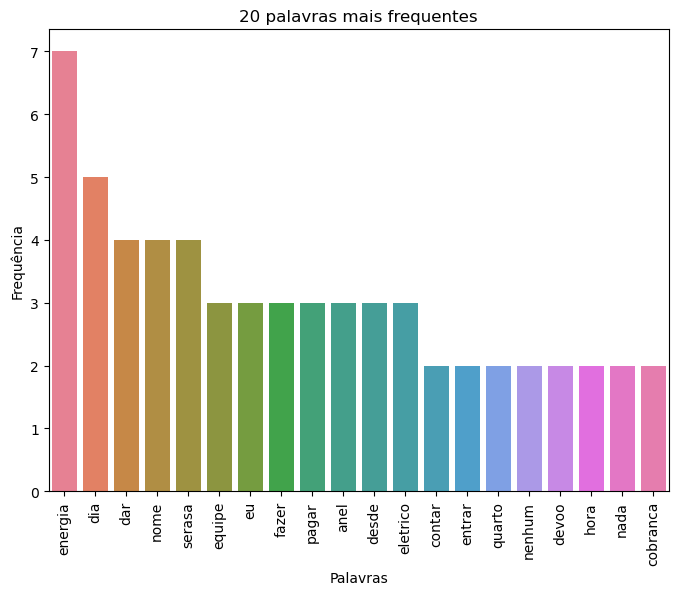

In [120]:
plot_frequency_barchart(df_complaints, 'preprocessing complaints')

9. WORDCLOUD

##### Wordcloud (nuvem de palavras) para visualizar, através de cada tópico, a relevância de cada palavra.

In [ ]:
""" 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

text = " ".join(lemmas_complaints)

wordcloud = WordCloud(background_color="white",width=1000, height=800, collocations = False, colormap='viridis').generate(text)

fig = plt.figure(figsize=(10,5))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
"""

In [ ]:
# 2

def create_wordcloud(model, topic):
    
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()


for i in range(0,5):
    create_wordcloud(lda_model, topic=i)

********

In [102]:
# find bigrams
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder

WORD_TOKENIZER = nltk.tokenize.word_tokenize

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents([WORD_TOKENIZER(doc, language='portuguese') for doc in df_complaints['preprocessing complaints']])

# filter only those that occur at least 20 times
finder.apply_freq_filter(20)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [104]:
# create a bigram column
df_complaints['bigrams'] = df_complaints['preprocessing complaints'].apply(lambda x: list(nltk.bigrams(x.split())))


In [98]:
def plot_bigram_wordcloud(df, colname):
  # Create a string from the bigrams
  bigrams = df[colname].tolist()
  bigrams = [bigram for sublist in bigrams for bigram in sublist]
  bigrams_string = ' '.join(["_".join(bigram) for bigram in bigrams])
  
  # stop words
  stop_words = nltk.corpus.stopwords.words('portuguese') + new_stopwords

  # Create the wordcloud
  wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                colormap='viridis',
                min_font_size = 10,
                collocations=False, 
                stopwords = set(stop_words), 
                normalize_plurals=False,
                max_words = 20,
                random_state=1).generate(bigrams_string)

  # Plot the wordcloud
  plt.figure(figsize = (5, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 

  
  plt.show()

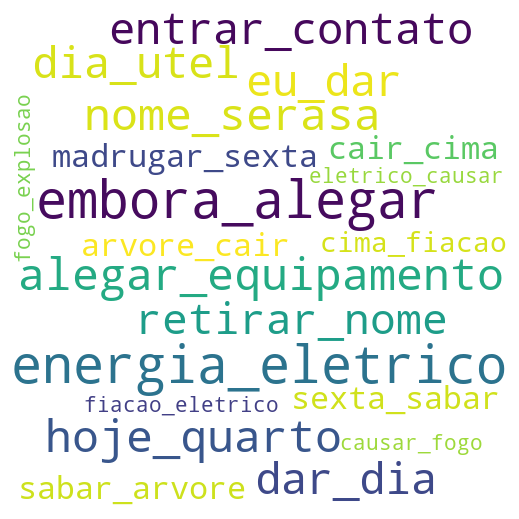

In [106]:
plot_bigram_wordcloud(df_complaints, 'bigrams')

*********

In [108]:
# find trigrams
trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_documents([WORD_TOKENIZER(doc, language='portuguese') for doc in df_complaints['preprocessing complaints']])

# filter only those that occur at least 20 times
finder.apply_freq_filter(20)
trigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [111]:
# create a trigram column
df_complaints['trigrams'] = df_complaints['preprocessing complaints'].apply(lambda x: list(nltk.trigrams(x.split())))

In [115]:
def plot_trigram_wordcloud(df, colname):
  # Create a string from the trigrams
  trigrams = df[colname].tolist()
  trigrams = [bigram for sublist in trigrams for bigram in sublist]
  trigrams_string = ' '.join(["_".join(trigram) for trigram in trigrams])

  # stop words
  stop_words = nltk.corpus.stopwords.words('portuguese') + new_stopwords

  # Create the wordcloud
  wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                colormap='viridis',
                min_font_size = 10,
                stopwords = set(stop_words),
                collocations=False, 
                normalize_plurals=False,
                max_words = 15,
                random_state=1).generate(trigrams_string)

  # Plot the wordcloud
  plt.figure(figsize = (5, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  
  plt.show()

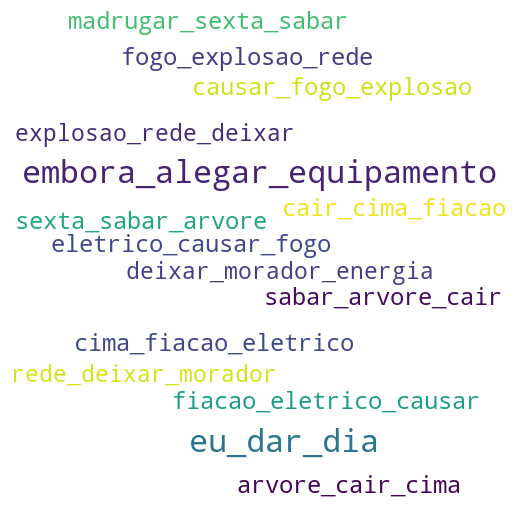

In [116]:
plot_trigram_wordcloud(df_complaints, 'trigrams')